# Project: Titanic - Machine Learning from Disaster

## 1) Import Lib

In [30]:
import pandas as pd
import numpy as np

In [31]:
train_df = pd.read_csv('/Users/tuananh-pc/Desktop/Titanic kaggle/train.csv')
test_df = pd.read_csv('/Users/tuananh-pc/Desktop/Titanic kaggle/test.csv')

In [32]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [33]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [34]:
train_df.head(2)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   

   Parch     Ticket     Fare Cabin Embarked  
0      0  A/5 21171   7.2500   NaN        S  
1      0   PC 17599  71.2833   C85        C

In [35]:
train_df.set_index(train_df['PassengerId'], inplace=True)

In [36]:
train_df.head(2)

PassengerId  Survived  Pclass  \
PassengerId                                  
1                      1         0       3   
2                      2         1       1   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   

             SibSp  Parch     Ticket     Fare Cabin Embarked  
PassengerId                                                   
1                1      0  A/5 21171   7.2500   NaN        S  
2                1      0   PC 17599  71.2833   C85        C

In [37]:
train_df.drop('PassengerId', axis=1, inplace=True)

In [38]:
train_df.head(2)

Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   

             SibSp  Parch     Ticket     Fare Cabin Embarked  
PassengerId                                                   
1                1      0  A/5 21171   7.2500   NaN        S  
2                1      0   PC 17599  71.2833   C85        C

In [39]:
test_df = pd.read_csv('/Users/tuananh-pc/Desktop/Titanic kaggle/test.csv', index_col='PassengerId')

In [40]:
test_df.tail(2)

Pclass                      Name   Sex  Age  SibSp  Parch  \
PassengerId                                                              
1308              3       Ware, Mr. Frederick  male  NaN      0      0   
1309              3  Peter, Master. Michael J  male  NaN      1      1   

             Ticket     Fare Cabin Embarked  
PassengerId                                  
1308         359309   8.0500   NaN        S  
1309           2668  22.3583   NaN        C

## 2) Feature Classification: Categorical vs Numerical

### Which feature are categorical?
* CategoricalfFeatures: nominal, ordinal, ratio, interval
* To classify the samples into sets of similar samples

### Which feature are numerical?
* Numerical features: discrete, continuous, timeseriess
* These values change from sample to sample

In [41]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [42]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


* Categorical: Survived, Sex, Embarked, Pclass (ordinal), Sibsp, Parch
* Numerical (continuous) Age, Fare (discrete)
* Mix types of data: Ticket, Cabin
* Contain Error/ Typo: Name
* Blank of Null: Cabin > Age > Embarked
* Various Data Type: String, Int, Float

## 3) Change Data types

In [43]:
train_df['Survived'] = train_df['Survived'].astype('category')

In [44]:
train_df['Survived'].dtype

CategoricalDtype(categories=[0, 1], ordered=False)

In [45]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    int64   
 2   Name      891 non-null    object  
 3   Sex       891 non-null    object  
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    int64   
 6   Parch     891 non-null    int64   
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    object  
dtypes: category(1), float64(2), int64(3), object(5)
memory usage: 77.6+ KB


In [46]:
features = ["Pclass", "Sex", "SibSp", "Parch", "Embarked"]

def convert_cat(df, features):
    for feature in features:
        df[feature] = df[feature].astype('category')
convert_cat(train_df,features)
convert_cat(test_df,features)

In [47]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    category
 6   Parch     891 non-null    category
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    category
dtypes: category(6), float64(2), object(3)
memory usage: 48.2+ KB


In [48]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Pclass    418 non-null    category
 1   Name      418 non-null    object  
 2   Sex       418 non-null    category
 3   Age       332 non-null    float64 
 4   SibSp     418 non-null    category
 5   Parch     418 non-null    category
 6   Ticket    418 non-null    object  
 7   Fare      417 non-null    float64 
 8   Cabin     91 non-null     object  
 9   Embarked  418 non-null    category
dtypes: category(5), float64(2), object(3)
memory usage: 22.7+ KB


## 4) Distribution of Numerical feature values across the samples

In [49]:
train_df.describe()

Age        Fare
count  714.000000  891.000000
mean    29.699118   32.204208
std     14.526497   49.693429
min      0.420000    0.000000
25%     20.125000    7.910400
50%     28.000000   14.454200
75%     38.000000   31.000000
max     80.000000  512.329200

## 5) Distribution of Categorical features

In [50]:
train_df.describe(include=['category'])

Survived  Pclass   Sex  SibSp  Parch Embarked
count        891     891   891    891    891      889
unique         2       3     2      7      7        3
top            0       3  male      0      0        S
freq         549     491   577    608    678      644

## 6) Exploratory Data Analysis (EDA)

Phan tich va khai pha du lieu

### Correlating categorical features
* Categorical features: Survived, Sex, Embarked, Pclass, SibSp, Parch

### Target Variable: Survived

In [51]:
train_df['Survived'].value_counts().to_frame()

count
Survived       
0           549
1           342

In [52]:
train_df['Survived'].value_counts(normalize=True).to_frame()

proportion
Survived            
0           0.616162
1           0.383838

### Sex

In [53]:
train_df['Sex'].value_counts().to_frame()

count
Sex          
male      577
female    314

In [54]:
train_df['Sex'].value_counts(normalize=True).to_frame()

proportion
Sex               
male      0.647587
female    0.352413

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Sex', ylabel='count'>

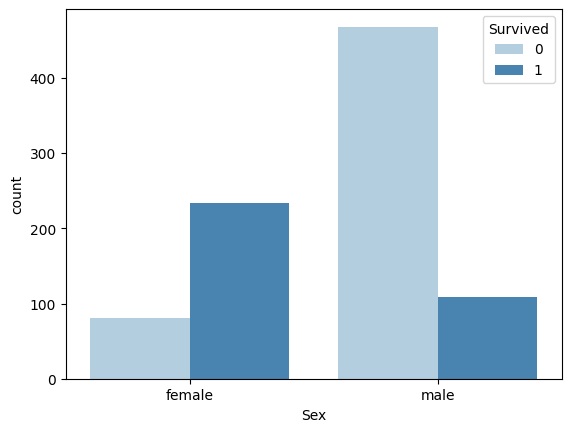

In [56]:
sns.countplot(data=train_df, x='Sex', hue='Survived', palette='Blues')

### Remaining Categorical Feature Columns

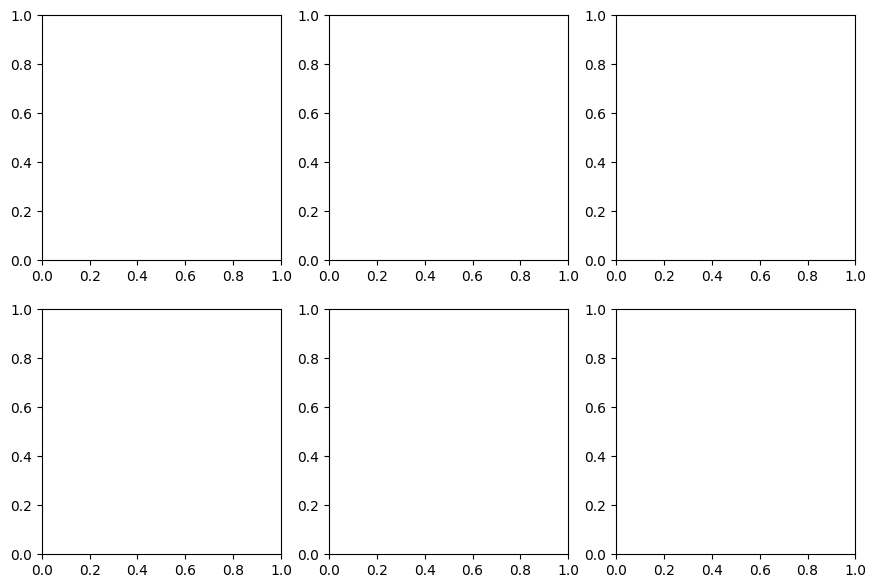

In [57]:
cols = ['Sex', 'Embarked', 'Pclass', 'SibSp', 'Parch']

n_rows = 2
n_cols = 3

fig, ax = plt.subplots(n_rows, n_cols, figsize = (n_cols*3.5, n_rows*3.5))

plt.show()

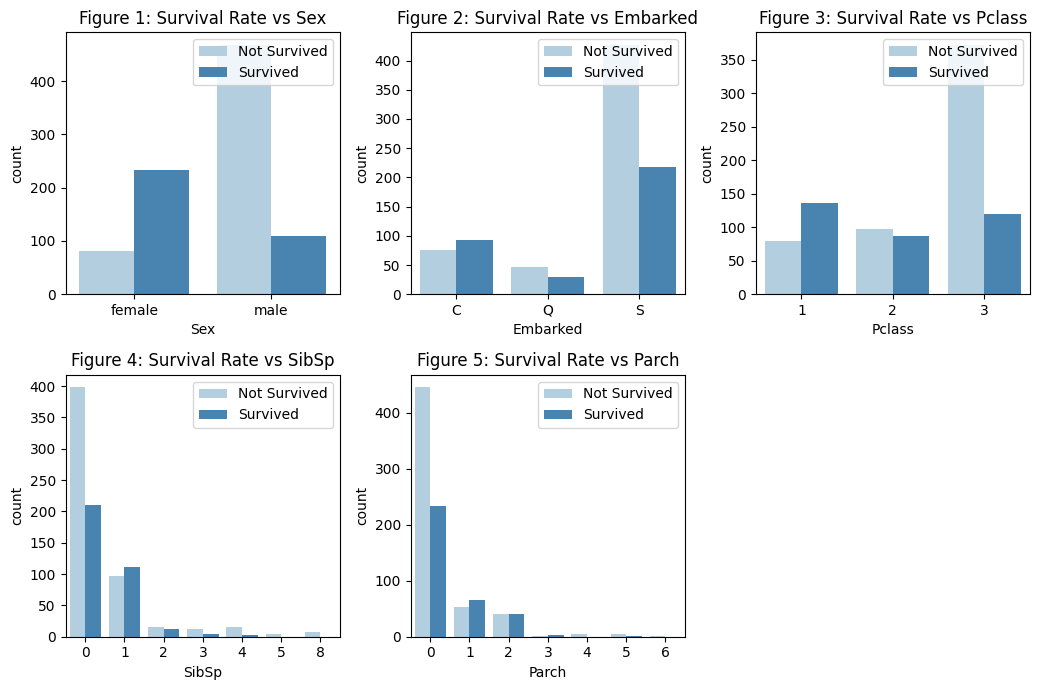

In [58]:
# Các cột cần vẽ
cols = ['Sex', 'Embarked', 'Pclass', 'SibSp', 'Parch']

# Số hàng
n_rows = 2
# Số cột
n_cols = 3

# Dùng matplotlib để vẽ subplot
# Số hàng là 2, số cột là 3
# Figsize -> Chỉnh size của biểu đồ
fig, ax = plt.subplots(n_rows, n_cols, figsize = (n_cols*3.5, n_rows*3.5))

# Vẽ từng đồ thị (Dùng vòng lăpj for loop)
for r in range (0, n_rows): # Dòng từ 0 đến dòng
    for c in range (0, n_cols): # Cột từ 0 đến cột
        i = r*n_cols + c # Index để loop vào list cols
        if i < len(cols): # Đảm bảo vẽ vào subplot <= 5 biểu đồ
            ax_i = ax[r,c] # ax tương ứng số hàng và số cột
            # Dùng sns và countplot để vẽ biểu đồ
            # Dùng index i chayj qua từng cols để tạo ra x
            sns.countplot(data=train_df, x=cols[i], hue='Survived', palette='Blues', ax=ax_i)
            # Set title cho từng biểu đồ
            # Biểu đồ = index i + 1
            # Survived Rate của từng biểu đồ = Cols loop qua từng giá trị i
            ax_i.set_title(f'Figure {i+1}: Survival Rate vs {cols[i]}')
            # Tạo chú thích ở phía trên cùng bên tay phải và gán nhãn là 'Survived' or 'Not Survived'
            ax_i.legend(title='', loc='upper right', labels=['Not Survived', 'Survived'])
ax.flat[-1].set_visible(False) # Remove the last subplot
# Tách layout của các biểu đồ
plt.tight_layout()
plt.show()

### Observation:
#### Survival Rate:
* Fig 1: Female survival rate > male
* Fig 2: Most people embarked on Southhampton, and also had the highest people not survived
* Fig 3: 1st class higher survived rate
* Fig 4: People going with 0 SibSp are mostly not survived. The number of passenger with 1-2 family members has a better chance of survival
* Fig 5: People going with 0 Parch are mostly not survived

### EDA for numerical features
* Numerical Features: Age (continous), Fare (discrete)

### Age

<Axes: xlabel='Age', ylabel='Count'>

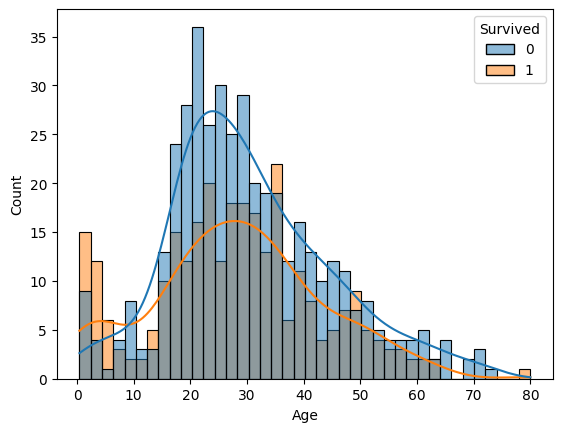

In [59]:
sns.histplot(data=train_df, x='Age', bins= 40, kde= True, hue= 'Survived')

### Fare

In [60]:
train_df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<Axes: xlabel='Fare', ylabel='Count'>

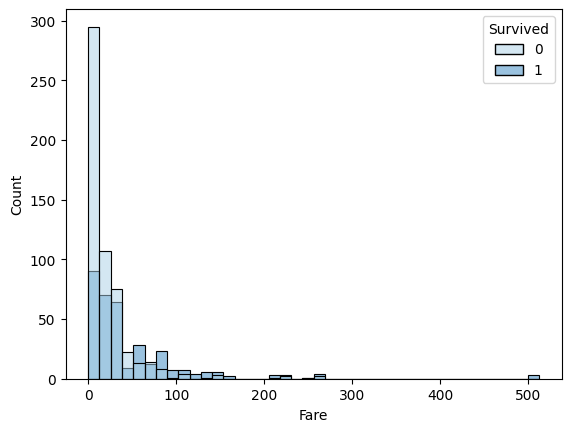

In [61]:
sns.histplot(data=train_df, x= 'Fare', bins= 40, palette= 'Blues', hue= 'Survived')

Cut data to 4 Quartile: 0-25%, 25-50%, 50-75%, 75-100%

In [62]:
fare_caregories = ['Economic', 'Standard', 'Expensive', 'Luxury']

quartile_data = pd.qcut(train_df['Fare'],4, labels= fare_caregories)

In [63]:
quartile_data = pd.qcut(train_df['Fare'],4, labels=fare_caregories)

<Axes: xlabel='Fare', ylabel='count'>

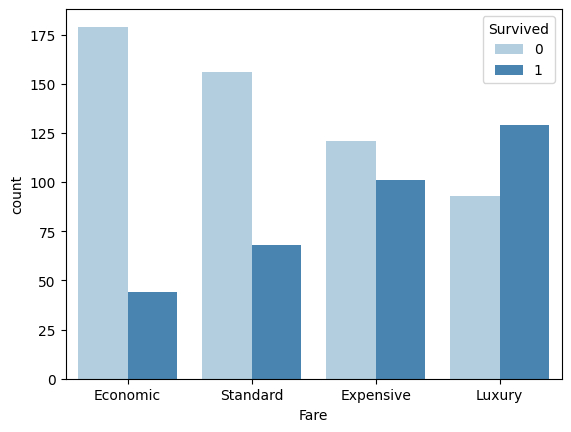

In [64]:
sns.countplot(x=quartile_data, palette='Blues',hue= train_df['Survived'])

## 7) Feature Engineering

Dung cac dimension san co, nhom lai voi nhau. Tao ra cac dimension moi. Muc dich lam giam chieu du lieu.

### Name
Use Regular Expression

In [65]:
train_df['Name'].head(2)

PassengerId
1                              Braund, Mr. Owen Harris
2    Cumings, Mrs. John Bradley (Florence Briggs Th...
Name: Name, dtype: object

In [66]:
import re # Import Regular Expression Moduel

def extract_title(name):
    p = re.compile(r',(.+)\.')
    return p.search(name).groups(1)[0].strip()

train_df['Title'] = train_df['Name'].apply(lambda name: extract_title(name))

In [67]:
train_df['Title'].value_counts()

Title
Mr                          517
Miss                        182
Mrs                         124
Master                       40
Dr                            7
Rev                           6
Col                           2
Mlle                          2
Major                         2
Ms                            1
Mrs. Martin (Elizabeth L      1
Lady                          1
Sir                           1
Mme                           1
Don                           1
Capt                          1
the Countess                  1
Jonkheer                      1
Name: count, dtype: int64

In [68]:
import re # Import Regular Expression Moduel

def extract_title(name):
    p = re.compile(r',([\w\s]+)\.')
    return p.search(name).groups(1)[0].strip()

train_df['Title'] = train_df['Name'].apply(lambda name: extract_title(name))
test_df['Title'] = test_df['Name'].apply(lambda name: extract_title(name))

In [69]:
train_df['Title'].value_counts()

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

In [70]:
test_df['Title'].value_counts()

Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64

<Axes: xlabel='Title', ylabel='count'>

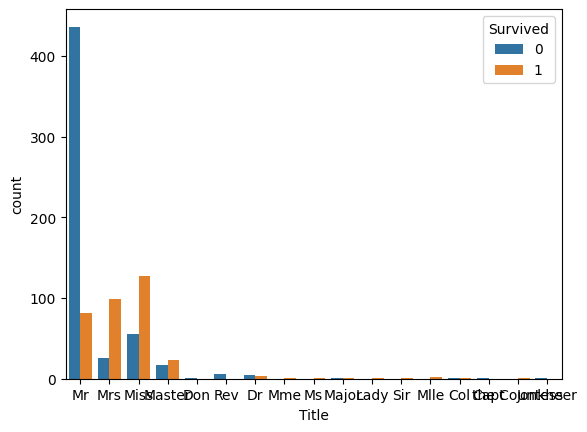

In [71]:
sns.countplot(data= train_df, x= 'Title', hue= 'Survived')

In [72]:
train_df['Title'].apply(lambda title: title if title in ['Mr', 'Mrs', 'Miss', 'Master'] else 'Other')

PassengerId
1         Mr
2        Mrs
3       Miss
4        Mrs
5         Mr
       ...  
887    Other
888     Miss
889     Miss
890       Mr
891       Mr
Name: Title, Length: 891, dtype: object

In [73]:
def group_title(title):
    if title in ['Mr', 'Mrs', 'Miss', 'Master']:
        return title
    elif title == 'Ms':
        return 'Miss'
    else:
        return 'Others'

train_df['Title'] = train_df['Title'].apply(lambda title: group_title(title))
test_df['Title'] = test_df['Title'].apply(lambda title: group_title(title))

In [74]:
train_df['Title'].value_counts()

Title
Mr        517
Miss      183
Mrs       125
Master     40
Others     26
Name: count, dtype: int64

In [75]:
test_df['Title'].value_counts()

Title
Mr        240
Miss       79
Mrs        72
Master     21
Others      6
Name: count, dtype: int64

<Axes: xlabel='Title', ylabel='count'>

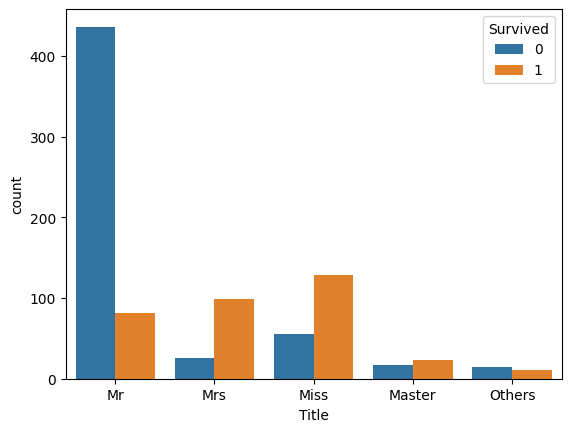

In [76]:
sns.countplot(data=train_df, x='Title', hue='Survived')

### Family
* SibSp, Parch

In [77]:
train_df['Family_Size'] = train_df['SibSp'].astype('int') + train_df['Parch'].astype('int') + 1
test_df['Family_Size'] = test_df['SibSp'].astype('int') + test_df['Parch'].astype('int') + 1

<Axes: xlabel='Family_Size', ylabel='count'>

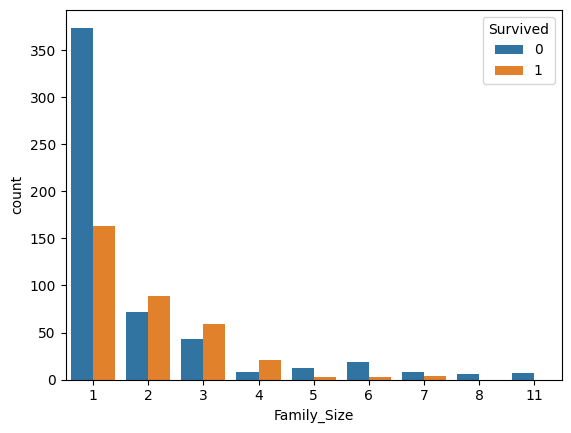

In [78]:
sns.countplot(data=train_df, x='Family_Size', hue='Survived')

In [79]:
train_df['Family_Cat'] = pd.cut(train_df['Family_Size'], bins=[0,1,4,6,20], labels=['Solo', 'Small','Medium','Large'])

<Axes: xlabel='Family_Cat', ylabel='count'>

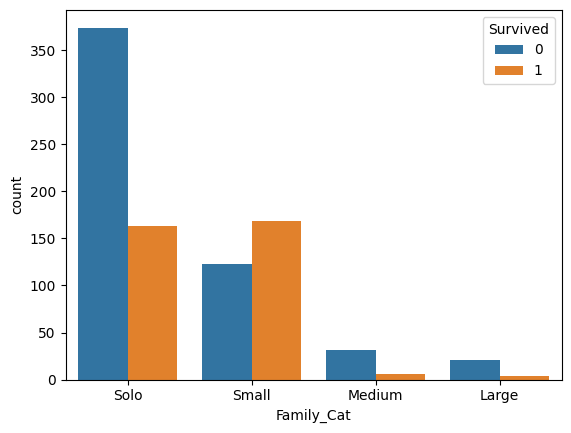

In [80]:
sns.countplot(data=train_df, x='Family_Cat', hue='Survived')

## 8) Data Wrangling

### Find missing values

In [81]:
num_features = ['Age', 'Fare']
cat_features = ['Sex', 'Pclass', 'Embarked', 'Title']#, 'Family_Cat']
feature_cols = num_features + cat_features
print(feature_cols)

['Age', 'Fare', 'Sex', 'Pclass', 'Embarked', 'Title']


In [82]:
def display_missing (df, feature_cols):
    n_rows = df.shape[0] # Lay tong so dong
    for col in feature_cols:
        missing_count = df[col].isnull().sum()
        if missing_count > 0:
            print(f"{col} has {missing_count*100/n_rows: .2f}% missing values.")

display_missing(train_df,feature_cols)
display_missing(test_df,feature_cols)

Age has  19.87% missing values.
Embarked has  0.22% missing values.
Age has  20.57% missing values.
Fare has  0.24% missing values.


### Filling missing values
#### Age
- Filling missing values with 'median' of whole dataset
- Co the tuoi cua nam va nu khac nhau
=> Tim age tuong dong voi cot nao khac. Fill gia tri missing theo gia tri group by nao do.

In [83]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Survived     891 non-null    category
 1   Pclass       891 non-null    category
 2   Name         891 non-null    object  
 3   Sex          891 non-null    category
 4   Age          714 non-null    float64 
 5   SibSp        891 non-null    category
 6   Parch        891 non-null    category
 7   Ticket       891 non-null    object  
 8   Fare         891 non-null    float64 
 9   Cabin        204 non-null    object  
 10  Embarked     889 non-null    category
 11  Title        891 non-null    object  
 12  Family_Size  891 non-null    int64   
 13  Family_Cat   891 non-null    category
dtypes: category(7), float64(2), int64(1), object(4)
memory usage: 63.2+ KB


In [84]:
age_by_sex_pclass = train_df.groupby(['Sex','Pclass'],as_index=False)['Age'].median()

In [85]:
age_by_sex_pclass

Sex Pclass   Age
0  female      1  35.0
1  female      2  28.0
2  female      3  21.5
3    male      1  40.0
4    male      2  30.0
5    male      3  25.0

In [86]:
train_df['Age'] = train_df['Age'].fillna(train_df.groupby(['Sex','Pclass'])['Age'].transform('median'))

In [87]:
test_df['Age'] = test_df['Age'].fillna(test_df.groupby(['Sex','Pclass'])['Age'].transform('median'))

In [88]:
display_missing(train_df,feature_cols)

Embarked has  0.22% missing values.


In [89]:
display_missing(test_df,feature_cols)

Fare has  0.24% missing values.


#### Embarked and Fare
Split data train and use sklearn fill missing value

In [90]:
X = train_df[feature_cols]
y = train_df['Survived']

In [91]:
X_test = test_df[feature_cols]

In [92]:
# Preprocessing pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

num_transformer = Pipeline(steps = [
    ('imputer',SimpleImputer(strategy='median')), # Dung imputer de fill missing value theo median
    ('scaler', StandardScaler()) # Dua ve cung 1 scale
])

cat_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')), # Dung imputer de fill missing value theo gia tri xuat hien thuong xuyen nhat
        ('encoder', OneHotEncoder(handle_unknown='ignore')) # Bien gia tri chu thanh gia tri so
])

#### Define function preprocesser
Dung de pre process cac input

In [93]:
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num',num_transformer,num_features),
    ('cat', cat_transformer, cat_features)
])

In [94]:
preprocessor.fit(X)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Sex', 'Pclass', 'Embarked', 'Title'])])

In [95]:
X = preprocessor.transform(X) # X -> X_train, X_Val

In [96]:
X_test = preprocessor.transform(X_test) # Fit preprocesser voi X

## 9) Model training

#### Split X -> X_train and X_validation, y -> y_train and y_validation

In [97]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2)

In [98]:
X_train.shape, X_val.shape

((712, 15), (179, 15))

In [99]:
X_test.shape

(418, 15)

In [100]:
# binary classification

from sklearn.linear_model import LogisticRegression

In [101]:
log_reg = LogisticRegression(solver='liblinear', max_iter=1000)

log_reg.fit(X_train,y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [102]:
log_reg.score(X_val,y_val)

0.7877094972067039

In [103]:
y_pred = log_reg.predict(X_val)

In [104]:
from sklearn.metrics import precision_score, recall_score

In [106]:
precision_score(y_val, y_pred), recall_score(y_val,y_pred)

(0.6666666666666666, 0.8307692307692308)

In [107]:
from sklearn.metrics import classification_report, confusion_matrix

In [108]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.76      0.82       114
           1       0.67      0.83      0.74        65

    accuracy                           0.79       179
   macro avg       0.78      0.80      0.78       179
weighted avg       0.81      0.79      0.79       179



In [110]:
# y = ax1 + bx2 + bias
# Neu muon nang bac co the dung Polynomial feature